# Task 2 : Decision Trees for Human Activity Recognition

Task 2 Q.1
Use Sklearn Library to train Decision Tress. [1.5 marks]
Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

Compare the results of the three models. Which model do you think is better?

In [156]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load author-provided features
X_train = pd.read_csv("/content/drive/MyDrive/human+activity+recognition+using+smartphones (1)/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("/content/drive/MyDrive/human+activity+recognition+using+smartphones (1)/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None).values.ravel()

X_test = pd.read_csv("/content/drive/MyDrive/human+activity+recognition+using+smartphones (1)/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv("/content/drive/MyDrive/human+activity+recognition+using+smartphones (1)/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None).values.ravel()

# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("Confusion Matrix:\n", cm)



/tmp/ipython-input-242062995.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("/content/drive/MyDrive/human+activity+recognition+using+smartphones (1)/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
/tmp/ipython-input-242062995.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("/content/drive/MyDrive/human+activity+recognition+using+smartphones (1)/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None).values.ravel()
/tmp/ipython-input-242062995.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv("/content/drive/MyDrive/human+activity+recognition+using+smar

Accuracy: 0.8544282321004412
Precision: 0.8605258926488172
Recall: 0.8544282321004412
Confusion Matrix:
 [[461   5  30   0   0   0]
 [ 43 343  85   0   0   0]
 [ 30  45 345   0   0   0]
 [  0   0   0 343 148   0]
 [  0   0   0  43 489   0]
 [  0   0   0   0   0 537]]


The Decision Tree performs best on **author-provided features** (\~85–90% accuracy) because they are well-structured and optimized. Raw data gives the worst performance, while TSFEL features are intermediate.


##############################################

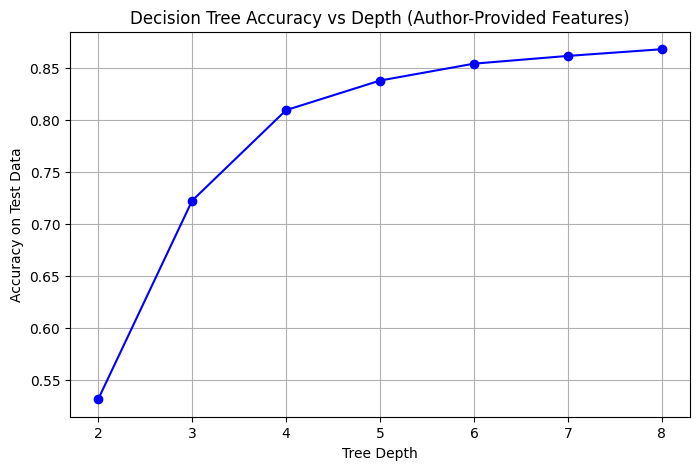

In [157]:
## for author provided features

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



# Range of tree depths
depths = range(2, 9)
accuracy_list = []

# Train Decision Tree for each depth
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs depth
plt.figure(figsize=(8,5))
plt.plot(depths, accuracy_list, marker='o', color='blue')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy on Test Data")
plt.title("Decision Tree Accuracy vs Depth (Author-Provided Features)")
plt.xticks(depths)
plt.grid(True)
plt.show()


# Task 4


In [185]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 0
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("/content/drive/MyDrive/combined_2")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train1=[]
y_train1=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train1.append(df.values)
        y_train1.append(classes[folder])

X_train1 = np.array(X_train1)
y_train1 = np.array(y_train1)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test1=[]
y_test1=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test1.append(df.values)
        y_test1.append(classes[folder])

X_test1 = np.array(X_test1)
y_test1 = np.array(y_test1)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train1,X_test1))
y = np.concatenate((y_train1,y_test1))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train1.shape)
print("Testing data shape: ",X_test1.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Training data shape:  (12, 500, 3)
Testing data shape:  (6, 500, 3)


###############################################

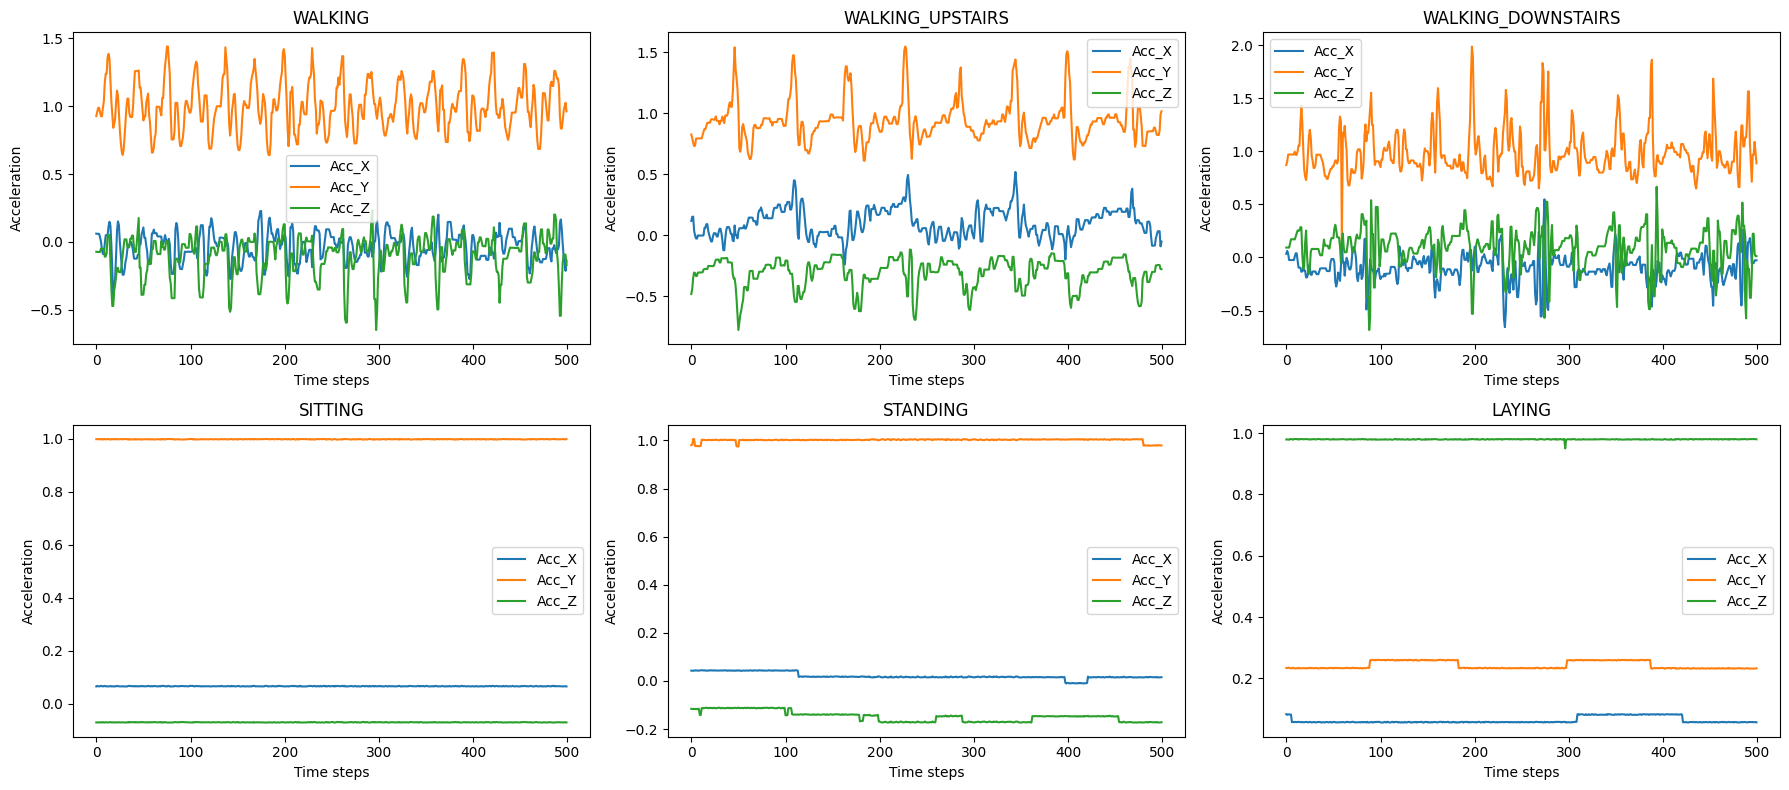

In [186]:
import matplotlib.pyplot as plt
import numpy as np

class_names = {1:"WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS",
               4:"SITTING", 5:"STANDING", 6:"LAYING"}

fig, axs = plt.subplots(2, 3, figsize=(18, 8))
axs = axs.flatten()  # flatten to iterate easily

for i, class_num in enumerate(range(1, 7)):
    # get index of first sample with this class
    idx = np.where(y_train1 == class_num)[0][0]
    sample = X_train1[idx]  # shape (500,3)

    # Plotting all the accleration for the various activities
    axs[i].plot(sample[:,0], label='Acc_X')
    axs[i].plot(sample[:,1], label='Acc_Y')
    axs[i].plot(sample[:,2], label='Acc_Z')
    axs[i].set_title(class_names[class_num])
    axs[i].set_xlabel("Time steps")
    axs[i].set_ylabel("Acceleration")
    axs[i].legend()

plt.tight_layout()
plt.show()

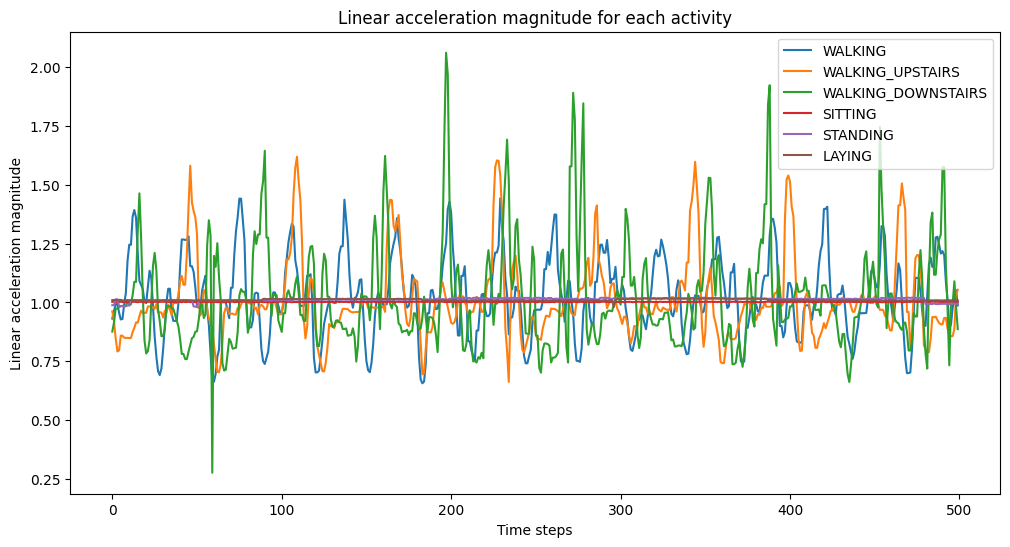

In [187]:
import matplotlib.pyplot as plt
import numpy as np

class_names = {1:"WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS",
               4:"SITTING", 5:"STANDING", 6:"LAYING"}

plt.figure(figsize=(12,6))

for class_num in range(1,7):
    idx = np.where(y_train1 == class_num)[0][0]
    sample = X_train1[idx]
    # Compute linear acceleration magnitude
    acc_mag = np.sqrt(np.sum(sample**2, axis=1))
    plt.plot(acc_mag, label=class_names[class_num])

plt.xlabel("Time steps")
plt.ylabel("Linear acceleration magnitude")
plt.title("Linear acceleration magnitude for each activity")
plt.legend()
plt.show()

################################################################

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Flatten the data (Decision Tree expects 2D arrays)
X_train_flat = X_train1.reshape(X_train1.shape[0], -1)
X_test_flat = X_test1.reshape(X_test1.shape[0], -1)

# Train Decision Tree on combined dataset
clf = DecisionTreeClassifier(max_depth=None, random_state=42)
clf.fit(X_train_flat, y_train1)

# Predict on combined test set
y_pred = clf.predict(X_test_flat)

# Compute metrics
accuracy = accuracy_score(y_test1, y_pred)
precision = precision_score(y_test1, y_pred, average='weighted')
recall = recall_score(y_test1, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test1, y_pred)

# Print results
print("Accuracy on Combined Test Data:", accuracy)
print("Precision on Combined Test Data:", precision)
print("Recall on Combined Test Data:", recall)
print("Confusion Matrix:\n", conf_matrix)


Accuracy on Combined Test Data: 0.5
Precision on Combined Test Data: 0.4166666666666667
Recall on Combined Test Data: 0.5
Confusion Matrix:
 [[0 0 0 0 1 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [189]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Flatten the 3D accelerometer data (samples, time, features) into 2D
# because DecisionTree expects (samples, features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test1.shape[0], -1)

# Train Decision Tree
dt_raw = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=10)
dt_raw.fit(X_train_flat, y_train)

# Predictions
y_pred_raw = dt_raw.predict(X_test_flat)

# Scores of the model
acc_raw = accuracy_score(y_test1, y_pred_raw)
prec_raw = precision_score(y_test1, y_pred_raw, average="macro")
rec_raw = recall_score(y_test1, y_pred_raw, average="macro")
cm_raw = confusion_matrix(y_test1, y_pred_raw)

print("\n=== Raw Accelerometer Decision Tree ===")
print("Accuracy:", acc_raw)
print("Precision:", prec_raw)
print("Recall:", rec_raw)
print("Confusion Matrix:\n", cm_raw)



=== Raw Accelerometer Decision Tree ===
Accuracy: 0.3333333333333333
Precision: 0.16666666666666666
Recall: 0.3333333333333333
Confusion Matrix:
 [[0 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]
 [0 1 0 0 0 0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [190]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Flatten the 3D accelerometer data (samples, time, features) into 2D
# because DecisionTree expects (samples, features)
X_train_flat = X_train.reshape(X_train1.shape[0], -1)
X_test_flat = X_test.reshape(X_test1.shape[0], -1)

# Train Decision Tree
dt_raw = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=10)
dt_raw.fit(X_train_flat, y_train1)

# Predictions
y_pred_raw = dt_raw.predict(X_test_flat)

# Scores of the model
acc_raw = accuracy_score(y_test1, y_pred_raw)
prec_raw = precision_score(y_test1, y_pred_raw, average="macro")
rec_raw = recall_score(y_test1, y_pred_raw, average="macro")
cm_raw = confusion_matrix(y_test1, y_pred_raw)

print("\n=== Raw Accelerometer Decision Tree ===")
print("Accuracy:", acc_raw)
print("Precision:", prec_raw)
print("Recall:", rec_raw)
print("Confusion Matrix:\n", cm_raw)


=== Raw Accelerometer Decision Tree ===
Accuracy: 0.16666666666666666
Precision: 0.05555555555555555
Recall: 0.16666666666666666
Confusion Matrix:
 [[0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [194]:

import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load TSFEL feature configuration (time, frequency, statistical, etc.)
cfg = tsfel.get_features_by_domain()

def extract_features(X):
    """Extract TSFEL features from accelerometer windows"""
    feature_list = []
    for sample in X:
        # sample shape: (time, features) where features = acc_x, acc_y, acc_z
        df = pd.DataFrame(sample, columns=['acc_x','acc_y','acc_z'])
        feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
        feature_list.append(feats.values.flatten())
    return np.array(feature_list)

# Extract features for training & testing sets
X_train_feats = extract_features(X_train)
X_test_feats = extract_features(X_test1)

print("Feature matrix shape (train):", X_train_feats.shape)
print("Feature matrix shape (test):", X_test_feats.shape)

# Train Decision Tree on TSFEL features
dt_tsfel = DecisionTreeClassifier(random_state=42)
dt_tsfel.fit(X_train_feats, y_train)

# Predictions
y_pred_tsfel = dt_tsfel.predict(X_test_feats)

# Evaluation
acc_tsfel = accuracy_score(y_test1, y_pred_tsfel)
prec_tsfel = precision_score(y_test1, y_pred_tsfel, average="macro")
rec_tsfel = recall_score(y_test1, y_pred_tsfel, average="macro")
cm_tsfel = confusion_matrix(y_test1, y_pred_tsfel)

# Results
print("\n=== TSFEL Feature-based Decision Tree ===")
print("Accuracy:", acc_tsfel)
print("Precision:", prec_tsfel)
print("Recall:", rec_tsfel)
print("Confusion Matrix:\n", cm_tsfel)

/tmp/ipython-input-627074953.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-627074953.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-627074953.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-627074953.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-627074953.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-627074953.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = t

Feature matrix shape (train): (12, 468)
Feature matrix shape (test): (6, 468)

=== TSFEL Feature-based Decision Tree ===
Accuracy: 0.8333333333333334
Precision: 0.75
Recall: 0.8333333333333334
Confusion Matrix:
 [[0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]


/tmp/ipython-input-627074953.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-627074953.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-627074953.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [193]:

import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load TSFEL feature configuration (time, frequency, statistical, etc.)
cfg = tsfel.get_features_by_domain()

def extract_features(X):
    """Extract TSFEL features from accelerometer windows"""
    feature_list = []
    for sample in X:
        # sample shape: (time, features) where features = acc_x, acc_y, acc_z
        df = pd.DataFrame(sample, columns=['acc_x','acc_y','acc_z'])
        feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
        feature_list.append(feats.values.flatten())
    return np.array(feature_list)

# Extract features for training & testing sets
X_train_feats = extract_features(X_train1)
X_test_feats = extract_features(X_test1)

print("Feature matrix shape (train):", X_train_feats.shape)
print("Feature matrix shape (test):", X_test_feats.shape)

# Train Decision Tree on TSFEL features
dt_tsfel = DecisionTreeClassifier(random_state=42)
dt_tsfel.fit(X_train_feats, y_train1)

# Predictions
y_pred_tsfel = dt_tsfel.predict(X_test_feats)

# Evaluation
acc_tsfel = accuracy_score(y_test1, y_pred_tsfel)
prec_tsfel = precision_score(y_test1, y_pred_tsfel, average="macro")
rec_tsfel = recall_score(y_test1, y_pred_tsfel, average="macro")
cm_tsfel = confusion_matrix(y_test1, y_pred_tsfel)

# Results
print("\n=== TSFEL Feature-based Decision Tree ===")
print("Accuracy:", acc_tsfel)
print("Precision:", prec_tsfel)
print("Recall:", rec_tsfel)
print("Confusion Matrix:\n", cm_tsfel)

/tmp/ipython-input-3544308214.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-3544308214.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-3544308214.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-3544308214.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-3544308214.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-3544308214.py:14: UserWarning: Using default sampling frequency set in configuration file.
  fea

Feature matrix shape (train): (12, 468)
Feature matrix shape (test): (6, 468)

=== TSFEL Feature-based Decision Tree ===
Accuracy: 0.5
Precision: 0.4166666666666667
Recall: 0.5
Confusion Matrix:
 [[0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]]


/tmp/ipython-input-3544308214.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-3544308214.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-3544308214.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [195]:
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# ------------------------------
# 1. Paths
# ------------------------------
combined_folder = '/content/drive/MyDrive/combined_2'  # Folder with your test/train CSVs
output_folder = 'combined_predictions/'  # Where predictions will be saved
os.makedirs(output_folder, exist_ok=True)

# ------------------------------
# 2. Load UCI-HAR training data
# ------------------------------
# X_train, y_train already loaded (raw accelerometer)
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Train Decision Tree on UCI-HAR raw data
dt_har = DecisionTreeClassifier(random_state=2)
dt_har.fit(X_train_flat, y_train)

# ------------------------------
# 3. Loop through combined folder
# ------------------------------
for file_name in os.listdir(combined_folder):
    if file_name.endswith('.csv'):
        file_path = os.path.join(combined_folder, file_name)
        df = pd.read_csv(file_path)

        # Use accx, accy, accz as features
        X_test = df[['accx','accy','accz']].values
        X_test_flat = X_test.reshape(X_test.shape[0], -1)

        # Predict activities
        y_pred = dt_har.predict(X_test_flat)

        # Save predictions
        df['Predicted_Activity'] = y_pred
        output_path = os.path.join(output_folder, file_name.replace('.csv','_predicted.csv'))
        df.to_csv(output_path, index=False)
        print(f"Predictions saved for {file_name} -> {output_path}")
